# Regressão linear e RNA para regressão

**Autor:** Felipe Maia Polo - Fundador e ex-presidente do Neuron - *Data science and Artificial Intelligence*, economista pela USP e mestrando em Estatística pela mesma instituição. Apaixonado por matemática, estatística e *data science*.

**Contato:** felipemaiapolo@gmail.com - https://www.linkedin.com/in/felipemaiapolo/

**Feedback:** https://forms.gle/U6yBVSYwxNRWaE15A

**Sugestões de leitura**

1. **Probabilidade:** Ross, S. (2014). A first course in probability. Pearson.
2. **Probabilidade e Estatística:** Morettin, P. A., & BUSSAB, W. O. (2017). Estatística básica. Editora Saraiva.
3. **Análise de Regressão (linear & logística):** Wooldridge, J. M. (2015). Introductory econometrics: A modern approach. Nelson Education.
4. **Machine Learning:** James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.

Vamos abrir as bibliotecas que usaremos:

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

from IPython.display import Image
from IPython.core.display import HTML 

import statsmodels.api as sm
import statsmodels.formula.api as smf

Até o momento trabalhamos com o que chamamos de análise estatística descritiva, que a grosso modo é fazer a descrição das variáveis em termos numéricos e gráficos, gerando insights para uma análise mais robusta que pode ser realizada posteriormente. Um dos modelos mais importantes em toda a estatística é o modelo de regressão linear, que veremos agora. Basicamente o modelo de regressão linear é utilizado para entender melhor a relação entre variáveis, testar hipóteses, fazer previsões e simulações. É um modelo bem popular entre a comunidade do Machine Learning, mas muitas vezes seu potencial é subestimado, pois as pessoas não entendem muito bem o tipo de informação que se pode tirar desse tipo de modelo. Quando falamos em regressão linear, pensamos que uma variável de interesse pode ser decomposta da seguinte maneira:

\begin{equation}
Y=\text{sinal}+\text{ruído}
\end{equation}

O sinal é aquilo que pode ser modelo e previsto, já o ruído é um termo aleatório que não é possível explicar com os dados, podemos pensá-lo como o 'acaso'. Podemos reescrever a equação acima da seguinte maneira:

\begin{equation}
Y=b+w_{1}X_{1}+w_{2}X_{2}+...+w_{k}X_{k}+\epsilon
\end{equation}

Na equação acima, o $\epsilon$ representa o ruído e todo o resto é o sinal que queremos aprender mais sobre. Logo, fazer o uso de modelos de regressão linear é estimar equações do tipo:

\begin{equation}
\hat{y}=\hat{b}+\hat{w_{1}}x_{1}+\hat{w_{2}}x_{2}+...+\hat{w_{k}}x_{k}
\end{equation}

**OBS 1:** *aprender o sinal nos dá poder de generalização. Se aprendemos o ruído em nossa base de dados, o poder de generalização pode ser comprometido (overfitting).*

**OBS 2:** *em estatística, quando usamos o "chapéu" em cima de alguma variável ou parâmetro, geralmente isso quer dizer que estamos predizendo aquela variável ou parâmetro. Por exemplo, $\hat{y}$ é uma previsão para $y$ e $\hat{b}$ é uma estimativa para $b$, que é o verdadeiro valor na população.*

Na equação acima, $\hat{y}$ é uma estimativa para uma variável resposta (variável dependente), $y$, de interesse; os $\hat{w_j}$ são os pesos estimados que cada variável terá; o $\hat{b}$ é o que chamamos de viés ou *bias*, que é também conhecido como coeficiente linear ou intercepto e os $x_{j}$ são variáveis que acreditamos ter poder explicativo sobre $y$ - conhecidas como variáveis independentes. Se estamos trabalhando com somente uma variável independente $x$, dizemos que temos uma regressão linear simples e se temos múltiplas variáveis independentes, dizemos que estamos trabalhando com uma regressão linear múltipla. O nome regressão linear vem do fato de estarmos estimando uma equação linear que se encaixa em nossos dados. Veja bem que isso **não** quer dizer que a relação entre $y$ e as variáveis da sua base de dados é linear. Preste atenção no seguinte exemplo, em que queremos estimar uma equação de salário:

\begin{equation}
\hat{\text{salar}}=\hat{b}+\hat{w_{1}}\text{educ}+\hat{w_{2}}\text{exp}+\hat{w_{3}}\text{exp}^2
\end{equation}

Nessa equação assumimos de antemão que a relação entre salário e educação é linear, mas a relação entre salário e experiência é quadrática - essa relação poderia ser exponencial, logarítimica etc. Para se estimar a equação de regressão linear utiliza-se o método dos mínimos quadrados, que é consistido na minimização de uma função perda (*loss*) chamada Erro Quadrático Médio (EQM). Existem duas maneira principais de se minimizar essa função erro, uma mais estatística (projeção ortogonal) e outra mais matemática (gradiente descendente). Veremos mais a frente um pouco mais sobre esse processo de estimação. Vamos a um exemplo simples, que já é capaz de mostrar o poder desta técnica: um(a) vendedor(a) de sorvetes percebe que a venda de sorvetes está positivamente relacionada à temperatura média do dia. Após ter coletado os dados de temperatura média (eixo $x$) e quantidade de sorvetes vendidos (eixo $y$) chegamos ao seguinte gráfico:

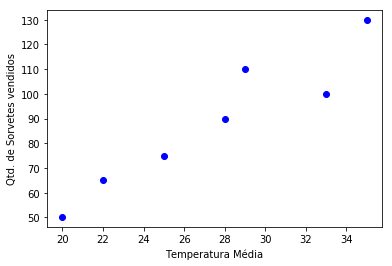

In [2]:
#Inputando os dados de Temperatura Vs. Qtd. de Sorvetes vendidos
x=[20,22,25,33,28,29,35]
y=[50,65,75,100,90,110,130]

#Plotando gráfico (scatter)
plt.plot(x,y,'bo')
plt.ylabel('Qtd. de Sorvetes vendidos')
plt.xlabel('Temperatura Média')
plt.show()

Um(a) cientista de dados quer saber agora qual a função linear da forma $\hat{y}=wx + \epsilon$ que melhor descreve essa relação - veja que assumimos $b=0$ para simplificar. No entanto, a constante $w$ é desconhecida. Para isso, o(a) especialista em análise de dados propõe o método dos Mínimos Quadrados para a estimação do parâmetro $w$. Nossa amostra é composta pelos pares ${(20,50), (22,65),...,(35,130)}$, sendo que temos 7 pontos (pares) no total. Logo, nossa amostra pode ser reescrita da seguinte maneira $(x_0,y_0),(x_1,y_1),...,(x_6,y_6)$. O método dos Mínimos Quadrados consiste-se em encontrar o valor de $w$ que minimiza o Erro Quadrático Médio (EQM)calculado com nossos dados. No nosso caso, o EQM é uma função de $w$ e é dado pela equação:

\begin{equation}
       \text{EQM}(w)=\frac{1}{7}\big [(y_0-\hat{y_0})^2+...+(y_6-\hat{y_6})^2 \big ]=\frac{1}{7}\big [(y_0-wx_0)^2+...+(y_6-wx_6)^2\big ]=\frac{1}{7}\sum_{i=0}^{6}(y_i-wx_i)^2
\end{equation}

Perceba que o EQM é uma função quadrática simples neste caso, ou seja, uma parábola. Vamos desenhá-la:

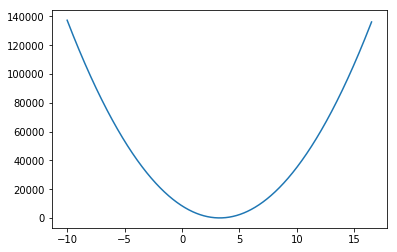

In [3]:
def eqm(x, y, w):
    x=np.array(x)
    y=np.array(y)
    N=y.shape[0]
    return (1/N)*np.inner(y-w*x, y-w*x)
  
EQM=[]
w = np.linspace(-10,16.5,1000) 

for i in w:
    EQM.append(eqm(x,y,i))
  
plt.plot(w,EQM)
plt.show()

Resta agora definir uma rotina de minimização, que é dada pela algoritmo do *gradiente descendente* para escolher $w$ que minimiza o EQM. Nesse caso temos somente um parâmetro a ser estimado, logo a versão do gradiente descendente para este caso é dado pela seguinte equação de recursão:


\begin{equation}
       w_{n+1}=w_n-\gamma\frac{\mathrm{d} \text{EQM}(w_n)}{\mathrm{d} w} 
\end{equation}

Geralmente começamos com $w_0$ pequeno e aleatório, além de uma learning rate positiva e constante ao longo do tempo. Epochs no algoritmo abaixo é o número de iterações na base de dados, ou seja, o número de vezes em que o algoritmo percorre toda sua base de dados:

In [4]:
#definindo o gradiente
def deqm(x, y, w):
    x=np.array(x)
    y=np.array(y)
    N=y.shape[0]
    return (1/N)*-2*np.inner(y-w*x, x)
  
#Definindo w inicial, nossa Learning Rate e o número de updates (epochs)
w=np.random.randn(1) #w inicial aleatório proveniente de uma N(0,1)
learning_rate=0.001
epochs=20
E=np.zeros((epochs, 3))

for i in range(epochs):
    E[i,0]=i
    E[i,1]=eqm(x,y,w)
    E[i,2]=deqm(x,y,w)
    w=w-learning_rate*deqm(x,y,w)

print("O w estimado é", w[0])

O w estimado é 3.2791587694615116


Dizemos então que a melhor reta que descreve a relação entre $x$ e $y$, dentro do que estávamos procurando é:

\begin{equation}
\hat{y}=3,28x
\end{equation}

Agora que sabemos que temos um valor para $w$, ou seja $\hat{w}$, vamos plotar juntamente com os pontos a reta que melhor descreve a relação entre temperatura e venda de sorvetes:

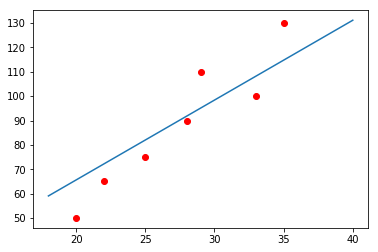

In [5]:
t = np.linspace(18, 40,1000) 
plt.plot(x,y,'ro')
plt.plot(t, w*t)
plt.show()

**Exercício:** interprete o valor estimado de $w$ para este caso.

A partir de agora voltaremos a utilizar a base de imóveis, então vamos reabrí-la e refazer as alterações:

In [6]:
data=pd.read_csv("kc_house_data.csv")

#Mudanças que haviam sido feitas
data['ano']=data['date'].str[:4]
data['ano']=data['ano'].astype('int64')

data['idade_ano']=data['ano']-data['yr_built']

data['idade']=np.where(data['idade_ano']>=30, 'Velho',
               np.where((data['idade_ano']>=10) & (data['idade_ano']<30), 'Intermediário',
               np.where(data['idade_ano']<10, 'Novo','')))

data['idade']=pd.Categorical(data['idade'], categories=["Velho", "Intermediário", "Novo"], ordered=True)

Perceba que o valor de $\hat{y}$ depende diretamente dos valores das variáveis independentes. Dado isso, é natural pensar que $\hat{y}$ não é somente uma estimativa, mas é uma estimativa **condicional** para $y$ (condicionada aos valores de $x$). Estastísticamente é correto dizer que  $\hat{y}$ é uma estimativa para a média condicional de $y$, ou seja, no fundo o que estamos estimando é a média de $y$ quando esta é condicionada ao nível das variáveis independentes. Dizemos então que $\hat{w}$ mede o impacto de uma variação em $x$ na média de $y$. Agora que já entendemos um pouco mais de como funciona o modelo de regressão linear simples, vamos utilizá-lo para tentar extrair mais informações sobre a base de imóveis que vínhamos trabalhando até o momento. Vamos explorar a ligação entre as variáveis "preço" e 'área do imóvel' estimando a seguinte equação:

\begin{equation}
\hat{\text{price}}=\hat{b}+\hat{w_1}\text{sqft_living}
\end{equation}

Para estimar a equação acima, utilizaremos o pacote *Stats models*, muito bom para estimar modelos estatísticos:

In [7]:
#Estimando a equação
results = smf.ols('price ~ sqft_living', data=data).fit()

#Vendo resultados
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:52:14   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O pacote solta uma tabela com vários resultados. Por hora vamos nos preocupar com os parâmetros estimados: de acordo com a tabela acima temos que $\hat{b}=-43580,00$ e $\hat{w}=280,62$. Isso quer dizer que quando aumentamos a área da casa em 1 uma unidade de área, a estimativa para a média de preço dos imóveis sobe \$280,62. 

A segunda coisa que vamos prestar atenção na tabela é a medida "R-squared" ou $R^2$. O $R^2$ é uma medida utilizada para medir aderência do modelo aos dados e que é melhor interpretável do que o EQM. A medida $R^2$, para o caso da regressão linear com intercepto, é definida da seguinte maneira:

\begin{equation}
R^2=\frac{Var(\hat{\mathbf{y}})}{Var(\mathbf{y})}=\frac{Var(\hat{y_1},\hat{y_2},...,\hat{y_n})}{Var(y_1,y_2,...,y_n)}
\end{equation}

O $R^2$, neste caso, varia de 0 a 1, sendo que se $R^2=0$, o modelo consegue explicar zero da variação dos dados reais e se $R^2=1$, toda a variação dos dados é explicada pelo modelo - o modelo tem o máximo de aderência aos dados. No caso acima, o valor para o $R^2$ é de quase $0,50$, o que nos diz que somente uma variável á capaz de explicar quase metade da variação dos preços na base de dados. É natural pensar que conforme formos incluindo mais variáveis em nossa regressão, melhor o poder explicativo dela, consequentemente maior $R^2$. É possível que esta alta no valor de $R^2$ se dê de forma artificial (overfitting), para isso a medida do $R^2$ ajustado foi inventada. Esta medida penaliza o valor de $R^2$ para cada variável adicionada ao modelo. Após estimar nossa reta de regressão, é possível utilizar o pacote *seaborn* para desenhá-la, mudando a opção *fit_reg* pra True:


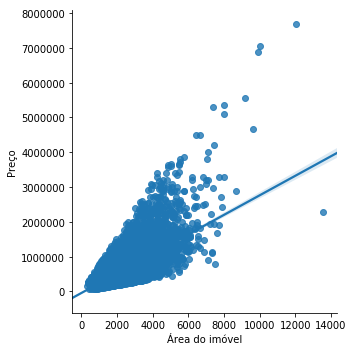

In [8]:
sns.lmplot(x="sqft_living", y="price", data=data, fit_reg=True, height=5) 

plt.ylabel('Preço')
plt.xlabel('Área do imóvel')
plt.show()

Quando estamos interessados no impacto de uma variável independente $x$ contínua sobre a média de $y$, podemos também interpretar o coeficiente estimado associado a $x$, utilizando a ideia de derivada do cálculo. Se a nossa equação de interesse é:

\begin{equation}
  \hat{y}=\hat{b}+\hat{w_1}x 
\end{equation}

A interpretação de $\hat{w_1}$ seria então a derivada:

\begin{equation}
  \hat{w_1}=\frac{\mathrm{d} \hat{y}}{\mathrm{d} x} 
\end{equation}

Perceba que a derivada é constante, pois estamos estimando uma reta. No entanto, se a equação que estivéssemos estimando fosse:

\begin{equation}
  \hat{y}=\hat{b}+\hat{w_1}x+\hat{w_2}x^2
\end{equation}

Temos que a derivada

\begin{equation}
  \frac{\mathrm{d} \hat{y}}{\mathrm{d} x}= \hat{w_1}+2 \hat{w_2}x
\end{equation}

Passaria a ter uma nova interpretação e o efeito de $x$ na média de $y$ não seria mais contante. E se $x$ fosse uma variável discreta? Ou binária? Sabemos que a ideia de derivada para avaliar o efeito de $x$ na média de $y$ não seria mais adequada. Vamos ver um exemplo em que $x$ é quantitativa e discreta. Assuma que queremos saber o efeito do número de quartos sobre o preço do imóvel, vamos então estimar uma equação em que a variável resposta é o preço e a variável independente é o número de quartos:

In [9]:
results = smf.ols('price ~ bedrooms', data=data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2271.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:52:17   Log-Likelihood:            -3.0652e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.298e+05   8931.866     14.533      0.000    1.12e+05    1.47e+05
bedrooms    1.217e+05   2554.304     47.651      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18859.406   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1199044.960
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      38.644   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Neste caso, a estimativa do parâmetro relativo à variável independente "bedrooms" é igual a 121.700 e isso quer dizer que a cada quarto extra na casa, esperamos que o preço do imóvel suba em $121.700. Matematicamente, poderíamos denotar o efeito do número de quartos como

\begin{equation}
\hat{w_1}=\frac{\Delta \hat{y}}{\Delta x} = 121.700
\end{equation}

Greficamente teríamos:

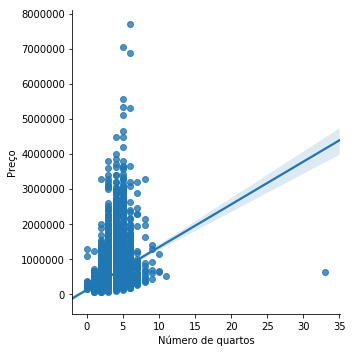

In [10]:
sns.lmplot(x="bedrooms", y="price", data=data, fit_reg=True, height=5) 

plt.ylabel('Preço')
plt.xlabel('Número de quartos')
plt.show()

**Exercício:** se excluíssemos o outlier, com mais de 30 quartos no imóvel, como a estimação para $w_1$ diferiria?

Agora que já vimos um caso para uma variável quantitativa discreta, vamos ver um caso para para uma variável qualitativa ou categórica (podendo ter duas ou mais categorias). Vamos começar com um exemplo de duas categorias: se a variável está em frente ao mar ou não. O parâmetro que acompanha a variável nesse caso nos dará a diferença de médias de preços entre a categoria 1 e a categoria 0. Em outras palavras, o parâmetro que acompanhará a variável "waterfront" nos dará o impacto sobre o valor esperado $y$, o preço, do imóvel estar localizado na frente do mar em relação a não estar:

In [11]:
results = smf.ols('price ~ waterfront', data=data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     1650.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:52:19   Log-Likelihood:            -3.0681e+05
No. Observations:               21613   AIC:                         6.136e+05
Df Residuals:                   21611   BIC:                         6.136e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.316e+05   2416.194    220.000      0.000    5.27e+05    5.36e+05
waterfront   1.13e+06   2.78e+04     40.626      0.000    1.08e+06    1.18e+06
==============================================================================
Omnibus:                    17750.357   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           924317.834
Skew:                           3.605   Prob(JB):                         0.00
Kurtosis:                      34.215   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O parâmetro estimado quer dizer que casas em frente ao mar custam em média \\$1.130.000 a mais do que casas que não ficam em frente ao mar. É fácil de ver isso com a seguinte diferença, sendo que $\hat{y}_1$ é a média dos preços para aquelas casas em frente ao mar e $\hat{y}_0$ é a média dos preços para aquelas casas que não estamos em frente ao mar:

\begin{equation}
  \hat{y}_1-\hat{y}_0=(\hat{b}+\hat{w_1}1)-(\hat{b}+\hat{w_1}0) = \hat{w_1} = 1.130.000 
\end{equation}

Neste caso temos uma variável qualitativa/categórica com apenas duas categorias, que já estão codificadas corretamente (0 e 1). E se estivermos trabalhando com uma variável qualitativa com mais de uma categoria? É simples, se estivermos trabalhando com uma variável com $k$ categorias, criaremos $k$ variáveis que podem assumir 1 ou 0 de acordo com o valor da variável original. Após fazer essa conversão, é **necessário** excluir uma delas para usar em nosso modelo de regressão linear e há um motivo matemático para isso que se chama **multicolinearidade** perfeita. Não entraremos em detalhes teóricos aqui, mas perceba que não precisamos manter todas as $k$ variáveis criadas para manter toda a informação, basta manter $k-1$ dessas variáveis. Vamos ver na prática como tudo isso funciona. Por exemplo, suponha que queremos estimar o efeito da idade do imóvel sobre o seu preço. Para isso, vamos tomar como variável independente a variável "idade", que tem três categorias "Velho", "Médio" e "Novo".  Como temos três categorias, vamos criar 3 variáveis binárias/dummies. O pacote Pandas tem uma função que cumpre esta função:

In [12]:
d=pd.get_dummies(data["idade"], dummy_na=True)
d=pd.DataFrame(d)

data=data.join(d)

Aproveitei e coloquei a opção *dummy_na=True*, isso porque poderia haver valores faltantes. Nesse caso não há, mas se houvesse, entraria como se fosse uma quarta categoria. Para utiliza-lás no modelo vamos pegar somente duas delas e excluir uma - por convenção, vamos excluir a variável "Velho". Vamos então estimar a seguinte equação:

\begin{equation}
  \hat{\text{price}}=\hat{b}+\hat{w_1}\text{Intermediário}+\hat{w_2}\text{Novo}
\end{equation}

Na equação de interesse, $\hat{w_1}$ mede a diferença de média de preços que os imóveis "Intermediários" e "Velhos" e $\hat{w_2}$ é a diferença de média de preços que os imóveis "Novos" e "Velhos". Estimando:

In [13]:
results = smf.ols('price ~ Intermediário + Novo', data=data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     170.7
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.79e-74
Time:                        04:52:19   Log-Likelihood:            -3.0744e+05
No. Observations:               21613   AIC:                         6.149e+05
Df Residuals:                   21610   BIC:                         6.149e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.051e+05   3148.410    160.416      0.000    4.99e+05    5.11e+05
Intermediário  7.976e+04   5953.255     13.398      0.000    6.81e+04    9.14e+04
Novo           1.131e+05   7330.504     15.435      0.000    9.88e+04    1.28e+05
==============================================================================
Omnibus:                    19232.672   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1174316.187
Skew:                           4.052   Prob(JB):                         0.00
Kurtosis:                      38.190   Cond. No.                         3.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Os resultados acima nos dizem que a média de preços entre os imóveis intermediários é \\$79.760 maior que os imóveis velhos$,$ enquanto este número é \$113.100 para os imóveis mais novos. 

**Exercício 1:** qual a diferença de médias entre os mais novos e os intermediários?

**Exercício 2:** Será que a valorização dos imóveis que estão próximos ao mar de dá de forma mais ou menos uniforme entre os imóveis? Vimos que o metro quadrado tende a ser mais valorizado. Vamos então estimar a seguinte equação:

\begin{equation}
  \hat{\text{price}}=\hat{b}+\hat{w_1}\text{sqft_living}+\hat{w_2}\text{waterfront}+\hat{w_3}\text{waterfront}*\text{sqft_living}
\end{equation}




In [14]:
#Estimando a equação
results = smf.ols('price ~ sqft_living*waterfront', data=data).fit()

#Vendo resultados
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     8723.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:52:20   Log-Likelihood:            -2.9903e+05
No. Observations:               21613   AIC:                         5.981e+05
Df Residuals:                   21609   BIC:                         5.981e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.622e+04   4206.470     -3.857      0.000   -2.45e+04   -7978.759
sqft_living              264.4287      1.860    142.140      0.000     260.782     268.075
waterfront             -2.676e+05   4.31e+04     -6.202      0.000   -3.52e+05   -1.83e+05
sqft_living:waterfront   348.6345     12.222     28.526      0.000     324.679     372.590
==============================================================================
Omnibus:                    13305.990   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           440499.952
Skew:                           2.429   Prob(JB):                         0.00
Kurtosis:                      24.576   Cond. No.                     5.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interprete os novos coeficientes.



Uma observação importante dos resultados que vimos até o momento é que os parâmetros estimados simplesmente nos trazem algumas descrições das relações entre variáveis na nossa base de dados, mas não nos dizem nada a respeito de uma relação de causa e efeito. Então, com as estimações feitas até o momento, é **impossível** dizer que imóveis novos são \$113.100 mais caros que os velhos somente por serem novos, pois há diversas variáveis que não estamos levando em consideração em nossa análise e que estão relacionadas tanto com a idade do imóvel quanto com o preço do mesmo. Imagine a seguinte situação, que é o que ocorre na cidade de São Paulo: os imóveis, especialmente apartamentos, mais antigos em São Paulo são conhecidos por serem muito espaçosos, mais do que os imóveis mais novos. Idade é então positivamente correlacionada com o tamanho do imóveis pois há uma tendência de que imóveis antigos sejam mais espaçosos. Pois bem, por um lado é esperado que estes imóveis sejam menos valorizados por serem mais antigos e por outro é esperado que sejam mais valorizados por serem mais espaçosos. Se obtivéssemos o mesmo resultado da tabela acima para a cidade de São Paulo, o grande espaço dentro dos imóveis estariam 'amenizando' sua diferença de preços em relação a imóveis mais novos e portanto subestimando o parâmetro que dá a diferença média de preços pelo idade do imóvel. Consequentemente o parâmetro estimado não refletiria a real importância de se ter imóveis mais novos.

Mas como lidar com essa situação? É relativamente simples, basta incluir as variáveis faltantes, ou aproximações delas, no modelo. Mas como saber quais variáveis devem ser incluídas? É um pouco mais complicado, pois isso depende da área do conhecimento em que o estudo está sendo desenvolvido, mas o raciocínio é o seguinte e você deve se fazer a seguinte pergunta: há alguma variável que afeta $y$, está correlacionada com alguma variável independente do meu modelo e que ainda não foi incluída no modelo? Se a resposta for sim, tente achar essas variáveis, ou aproximações delas (*proxys*) e as inclua no modelo. Se ocorrer de você não ter todas elas à sua disposição, pelo menos você conseguirá diminuir o *viés* sobre as estimações e terá mais ou menos uma ideia para que lado este viés aponta. Quando incluímos mais de uma variável em nosso modelo, a interpretação de seus coeficientes muda levemente, pois agora estamos *controlando* por diversos efeitos confundidores, como falado. Vamos estimar a seguinte equação e depois discutir a interpretação dos coeficientes (vamos incluir a interação envolvendo 'waterfront' na próxima estimação):

\begin{equation}
  \hat{\text{price}}=\hat{b}+\hat{w_1}\text{sqft_living}+\hat{w_2}\text{bedrooms}+\hat{w_3}\text{waterfront} + \hat{w_4}\text{Intermediário}+\hat{w_5}\text{Novo}
\end{equation}

In [16]:
results = smf.ols('price ~ sqft_living + bedrooms + waterfront + Intermediário + Novo', data=data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     5384.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:55:26   Log-Likelihood:            -2.9886e+05
No. Observations:               21613   AIC:                         5.977e+05
Df Residuals:                   21607   BIC:                         5.978e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.854e+04   6313.582     14.023      0.000    7.62e+04    1.01e+05
sqft_living     320.5600      2.371    135.205      0.000     315.913     325.207
bedrooms      -5.582e+04   2216.062    -25.187      0.000   -6.02e+04   -5.15e+04
waterfront     7.643e+05   1.95e+04     39.239      0.000    7.26e+05    8.02e+05
Intermediário  -1.07e+05   4204.491    -25.442      0.000   -1.15e+05   -9.87e+04
Novo          -5.049e+04   5065.642     -9.967      0.000   -6.04e+04   -4.06e+04
==============================================================================
Omnibus:                    12581.843   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380207.371
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      23.042   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Os resultados presentes na tabela acima são resultados provenientes de uma regressão múltipla e devem ser interpretados da seguinte maneira: o parâmetro associado a uma variável $x$ é a variação esperada $y$ decorrente de uma variação em uma unidade em $x$ **mantendo todas as outras variáveis constantes**. Isso pode explicar o motivo de o coeficiente associado à variável do número de quartos ser negativo - estamos mantendo a área do imóvel intacta e variando somente o número de quartos, ou seja, estamos deixando o imóvel mais segmentado e por isso este está perdendo valor. Vamos agora interpretar o coeficiente de "waterfront": dizemos que mesmo após controlar por diversas outras variáveis (todas as outras incluídas na regressão), estar em frente ao mar valoriza o imóvel - perceba também que este coeficiente diminuiu em magnitude, nos dizendo que provavelmente parte do seu efeito estava embutido em outra variável que adicionamos na regressão. 

**Exercício:** outro ponto interessante a destacar é que temos nesse momento que o imóvel ser mais antigo aumenta seu valor!!! Contra-intuitivo... como vocễ poderia explicar isso?

#### Teste de hipóteses e intervalo de confiança

Até o momento falamos exclusivamente de estimação e interpretação de parâmetros, mas resta nos perguntarmos: o quão confiáveis são essas estimativas? Devemos nos fazer essa pergunta pois, lembre-se, **não** observamos toda a população mas sim uma amostra dela. Pode ser que, por obra do destino, essa amostra nos tenha retornado estimações que não batem com a realidade da população, não porque temos uma amostra viesada, mas por puro acaso. Neste caso é necessário aplicar a ideia de teste de hipóteses da teoria estatística. Como funciona então? Quando fazemos um teste sempre começamos com uma hispótese nula ($H_0$), ou seja, uma hipótese inicial. Suponha que estamos estimando o seguinte modelo de regressão linear:

\begin{equation}
   \hat{y}=\hat{b}+\hat{w_1}x_1+...+\hat{w_j}x_j+...+\hat{w_k}x_k
\end{equation}

Vamos fazer um teste para o valor de $w_j$ na população. É usual tomar como hipótese nula para o parâmetro da j-ésima variável independente a hipótese de que esta variável não tenha influência sobre $y$, ou seja, de que $w_j=0$. A hipótese alternativa seria então de que esta variável tenha efeito sobre a variável dependente, ou seja, $w_j \neq 0$. De maneira forma escrevemos as hipóteses da seguinte forma:

1. $H_0:~w_j=0$ 
2. $H_1:~w_j \neq 0$ 

Depois de formular as nossas hipóteses, é necessário entender o seguinte procedimento: assumimos que $H_0$ é verdadeira e dependendo do resultado do nosso teste, rejeitamos ou não rejeitamos $H_0$. Então definimos um nível de significância $\alpha$ para o teste que varia de 0 a 1, sendo que quanto mais próximo de 0 menor a probabilidade de rejeitar $H_0$ quando essa é verdadeira. Depois de fixar $\alpha$, olhamos para a parte da tabela que que diz "$P>|t|$", o p-valor, e comparamos com o nível de significância: se o p-valor é menor que $\alpha$, então rejeitamos a hipótese nula $H_0$ de que $w_j=0$ na população. Na prática assumimos $\alpha=0.1$, $\alpha=0.05$ e $\alpha=0.01$ e vemos para cada um desses casos se rejeitamos $H_0$ ou não. 

Uma outra coisa legal para se olhar quando fazemos uma estimação é para o intervalo de confiança. Este é dado pelas colunas "[0.025" e "0.975]" da nossa tabela, sendo que dizemos que a primeira coluna nos dá o limite inferior do intervalo e a segunda coluna nos dá o limite superior do intervalo. Uma coisa que vocês podem perceber é que $0.975-0.025=0.95$, ou seja, dizemos que o nível de confiança do intervalo é $\gamma=0.95$. Na prática isso quer dizer que se tirássemos amostras aleatórias da mesma população, esperaríamos que em $95\%$ das vezes, o intervalo calculado conteria o parâmetro verdadeiro da população.

OBS: não entraremos aqui em detalhes técnicos de como esses cálculos são realizados, pois há uma longa trilha de aprendizado até se chegar nesse ponto, então é aconselhável o estudo mais aprofundado utilizando um livro de estatística.

#### Feature engineering

Até o momento trabalhamos com a variáveis basicamente do jeito que vieram, tirando algumas excessões. Vamos dar uma transformada em algumas das variáveis presentes em nossa base de dados com o objetivo de enriquecer a nossa análise, além de criar variáveis novas e que tragam novas informações. Primeiramente, vamos criar duas novas variáveis utilizando as variáveis de área do imóvel e do lote (sqft_living e sqft_lot), que farão uma comparação entre um imóvel em questão e os quinze imóveis mais próximos: vamos calcular qual a relação percentual entre as áreas de um imóvel e a média dos imóveis mais próximos.

In [17]:
data['sqft_living_rel']=data['sqft_living']/data['sqft_living15']
data['sqft_lot_rel']=data['sqft_lot']/data['sqft_lot15']

Em segundo lugar, vamos criar uma variável que nos retorna o percentual da área interna da imóvel dedicada ao porão:

In [18]:
data['sqft_basement_rel']=data['sqft_basement']/data['sqft_living']

Em terceiro lugar, vamos calcular quantos banheiros e quantos quartos há por unidade de área:

In [19]:
data['bathrooms_rel']=data['bathrooms']/data['sqft_living']
data['bedrooms_rel']=data['bedrooms']/data['sqft_living']

Em quarto lugar, vamos padronizar as variáveis *sqft_living* e *sqft_lot* para terem média 0 e desvio-padrão igual a 1 (padronização). Para fazer essa transformação em uma variável $x$  basta pegar cada um de seus valores, subtrair a média de $x$ e dividir pelo seu desvio-padrão, da seguinte forma:

\begin{equation}
  z=\frac{x-\bar{x}}{\sigma_x}
\end{equation}

Sendo que $z$ é a variável transformada. Se $z$ é negativo, quer dizer que o $x$ estava abaixo da média; se $z$ é 0, quer dizer que $x$ estava na média e se $z>0$, temos que $x$ estava acima de sua média. O desvio-padrão que está dividindo dá a $z$ o aspecto de estar medido em desvios-padrões da variável inicial $x$. Esse fato torna valores de $z$ mais comparáveis com valores de outras variáveis que sofreram a mesma transformação. Vamos assumir que $z=1.5$, o que isso quer dizer? Quer dizer que o $x$ transformado estava 1.5 desvios-padrões acima de sua própria média. Vamos lá:

In [20]:
data['sqft_living_pad']=(data['sqft_living']-data['sqft_living'].mean())/data['sqft_living'].std()
data['sqft_lot_pad']=(data['sqft_lot']-data['sqft_lot'].mean())/data['sqft_lot'].std()

Em quinto lugar, vamos agora criar uma variável que nos dá o tempo (em anos) desde a última reforma. Se não houve reforma, vamos tomar a data de construção para calcular os anos:

In [21]:
#Primeiramente vamos criar uma variável da data da última obra

data['ultima_obra']=np.where(data['yr_built']>data['yr_renovated'],data['yr_built'],data['yr_renovated'])

#Agora vamos criar a variável que queremos

data['delta_obra']=data['ano']-data['ultima_obra']

Vamos então rodar nossa regressão, agora voltando a incluir a interação envolvendo 'waterfront':

In [22]:
results = smf.ols('price ~ sqft_living_pad*waterfront + delta_obra + sqft_lot_pad + sqft_living_rel + sqft_lot_rel + sqft_basement_rel + bedrooms_rel + bathrooms_rel', data=data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     3182.
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        04:57:34   Log-Likelihood:            -2.9782e+05
No. Observations:               21613   AIC:                         5.957e+05
Df Residuals:                   21602   BIC:                         5.957e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   4.704e+05   1.17e+04     40.208      0.000    4.47e+05    4.93e+05
sqft_living_pad              3.21e+05   2741.978    117.080      0.000    3.16e+05    3.26e+05
waterfront                  4.291e+05   2.23e+04     19.273      0.000    3.85e+05    4.73e+05
sqft_living_pad:waterfront  3.018e+05   1.07e+04     28.325      0.000    2.81e+05    3.23e+05
delta_obra                  2859.7745     68.711     41.620      0.000    2725.095    2994.454
sqft_lot_pad               -1.189e+04   1811.707     -6.562      0.000   -1.54e+04   -8337.349
sqft_living_rel            -1.677e+05   6191.753    -27.079      0.000    -1.8e+05   -1.56e+05
sqft_lot_rel                 462.7463   1395.610      0.332      0.740   -2272.752    3198.245
sqft_basement_rel          -8.138e+04   1.01e+04     -8.026      0.000   -1.01e+05   -6.15e+04
bedrooms_rel               -2.186e+07   3.79e+06     -5.769      0.000   -2.93e+07   -1.44e+07
bathrooms_rel               1.597e+08   6.23e+06     25.637      0.000    1.47e+08    1.72e+08
==============================================================================
Omnibus:                    12673.317   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392371.307
Skew:                           2.281   Prob(JB):                         0.00
Kurtosis:                      23.369   Cond. No.                     1.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OBS: o segundo 'warning' produzido pela tabela se dá pelas diferentes escalas das variáveis e não por um problema de multicolinearidade, como alertado neste post https://stats.stackexchange.com/questions/332483/why-does-matrix-condition-number-change-drastically-when-a-constant-is-added >>> Foi necessário testar

**Exercício:** Interprete os coeficientes e os p-valores de  *delta_obra, sqft_living_pad* e *sqft_lot_rel*. Interprete o $R^2$.

Um ponto que foi omitido até o momento é que nem sempre os parâmetros estimados e os p-valores de uma regressão linear são confiáveis. Em primeiro lugar, é importante que a variável associada ao parâmetro de interesse seja não correlacionada com o erro - se isso for verdade, temos que a estimativa é confiável (consistente) para grandes amostras (N grande). Em segundo lugar, se N é grande e os erros (diferença entre preço real e previsto) são não correlacionados entre os imóveis e têm média nula, além de mais algumas condições, é possível testar hipóteses, pois os estimadores dos nossos pesos têm distribuição aproximadamente conhecida (Greene, 2000). 

E se N for pequeno, por exemplo? Se isso ocorrer, é de extrema importância que o erro do modelo de regressão tenha distribuição Normal ou aproximadamente Normal. Já vimos que o preço tem uma distribuição assimétrica e com valores muito extremos, o que dificultará que nossa hipóteses sobre o erro sejam verdadeiras. Uma alternativa que funciona muitas vezes é trabalharmos com o *log* natural da variável dependente, no caso o preço. Isso porque suprimimos grandes variações e assimetrias. Vamos então criar essa variável:

Fonte: Greene, W. H. (2000). Econometric analysis 4th edition. International edition, New Jersey: Prentice Hall, 201-215.

In [22]:
data['log_price']=np.log(data['price'])

É possível ver que 'achatamos' nossa distribuição original:

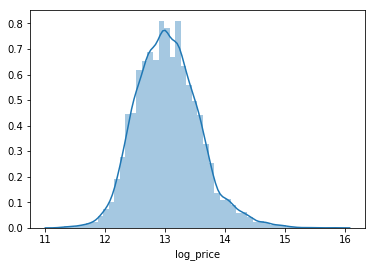

In [23]:
sns.distplot(data['log_price'])
plt.show()

O 'problema' de trabalhar com o *log* natural de uma variável como variável dependente é que a interpretação dos pesos que vínhamos vendo até o momento não é mais válida. Por outro lado, essa outra interpretação pode enriquecer a análise de certa maneira. Suponha que queremos estimar a seguinte equação:

\begin{equation}
\text{ln}(\hat{y})=\hat{b}+\hat{w_1}x_1+\hat{w_2}x_2
\end{equation}

Qual a maneira correta de interpretarmos a estimativa de $w_1$? Sabemos que podemos escrevê-la como:

\begin{equation}
\hat{w_1}=\frac{\Delta \text{ln}(\hat{y})}{\Delta x_1}
\end{equation}

Como a relação entre a variável dependente e $x_1$ é linear, vamos tomar $\Delta x_1$ qualquer, que $\hat{w_1}$ continua sendo constante. Assim temos:

\begin{equation}
\hat{w_1}=\frac{\Delta \text{ln}(\hat{y})}{\Delta x_1} \Rightarrow \Delta \text{ln}(\hat{y})=\text{ln}(\hat{y_1})-\text{ln}(\hat{y_0})=\text{ln}\Bigg(\frac{\hat{y_1}}{\hat{y_0}}\Bigg)=\hat{w_1} \Delta x_1 \Rightarrow \Delta \% \hat{y}=\frac{\hat{y_1}}{\hat{y_0}}-1=e^{\hat{w_1}\Delta x_1}-1
\end{equation}

Vamos então estimar uma equação simples, afim de entender melhor essa interpretação:

In [24]:
results = smf.ols('log_price ~ sqft_living_pad', data=data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:13:26   Log-Likelihood:                -9670.2
No. Observations:               21613   AIC:                         1.934e+04
Df Residuals:                   21611   BIC:                         1.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0478      0.003   5067.561      0.000      13.043      13.053
sqft_living_pad     0.3662      0.003    142.233      0.000       0.361       0.371
==============================================================================
Omnibus:                        3.128   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                3.149
Skew:                           0.027   Prob(JB):                        0.207
Kurtosis:                       2.974   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**OBS:** a alta no valor de "Prob(JB)", evidencia que a distribuição dos erros da regressão têm características normais (teste nos resíduos).

Como interpretar o coeficiente de *sqft_living_pad*, por exemplo? Sabemos que quando variamos somente essa variável em um desvio-padrão, mantendo tudo mais constante, chegamos em:

\begin{equation}
\Delta \% \hat{y}=e^{0.3662}-1 \approx 44,22\%
\end{equation}

E isso quer dizer que, em média, uma elevação em um desvio-padrão na área do imóvel está associada a uma alta no preço de aproximadamente $44,22\%$. Veja que poderíamos ter tomado qualquer valor de $\Delta x_1$.

**OBS**: quando nossa variável de interesse é representada por valores positivos (e.g. preço), costumamos utilizar seu *log* como variável dependente ao invés de seu valor bruto. Isso porque tornamos nossa variável dependente não limitada (teoricamente podendo assumir qualquer valor real), atendo hipóteses do modelo clássico de regressão. Além disso, geralmente tornamos nossas estimações mais confiáveis (para pequenas amostras) e nossos coeficientes estimados mais interpretáveis (apesar de termos que fazer algumas contas extras). Nesta apostila não adotamos essa medida por questões didáticas.

### Machine Learning: Regressão linear e Redes Neurais Artificiais para regressão (prever valores quantitativos)

Na parte em que falamos de regressão linear focamos nossas energias em tentar descrever, interpretar e validar estatisticamente as relações entre uma variável quantitativa $y$ e um conjunto de variáveis independentes. Apesar de a regressão linear ser muito boa para entendermos mensagens escondidas nos dados, ela não cumpre um papel muito bom quando queremos criar um modelo preditivo, isso porque a hipótese de linearidade limita muita a flexibilidade e generalização da função estimada e que conecta as variáveis independetes a $y$. Para alcançar poder preditivo, utilizaremos uma rede neural, que tem grande poder de ser moldar ao dados. Por outro lado, será muito difícil de interpretar as relações estimadas, uma vez que as redes neurais se comportam como caixas pretas -  existe uma relação negativa clara entre interpretabilidade e preditividade entre os modelos estatísticos e de machine learning. Antes de montarmos nossa rede neural para prever o preço dos imóveis, vamos preparar nossos dados.

#### Divisões da base de dados

Sempre que estamos criando um algoritmo para que o computador aprenda a realizar uma tarefa, dividimos nossa base de dados em três partes, geralmente com um número diferente de observações: a base de treino (~80% dos dados), a base de validação (~10% dos dados) e a base de teste (~10% dos dados). O computador aprenderá a realizar a tarefa com a base de treinamento, ou seja, o modelo será treinado nela. A base de validação será acessada conforme o treinamento for ocorrendo e ela será importante para testar diferentes variações de modelos, geralmente que se devem à variações nos hiperparâmetros (parâmetros arbitrários que não são aprendidos pelo computador). A base de teste será acessada somente quando o modelo estiver treinado e validado e servirá para se ter uma ideia da performance do modelo que construímos. Para fazer essa divisão, utilizaremos uma função do pacote "Scikit-Learn", que além de fazer a separação, nos permite "embaralhar" as linhas de antemão.

In [90]:
X=data[["sqft_living_pad", "waterfront" , "sqft_lot_pad", "sqft_living_rel", "sqft_lot_rel", "sqft_basement_rel", "bedrooms_rel", "bathrooms_rel" , "delta_obra"]]
y=data["price"]

Criando interação entre 'sqft_living_pad' e 'waterfront':

In [92]:
X.loc[:,"intera"]=X.loc[:,"sqft_living_pad"]*X.loc[:,"waterfront"]

Dividindo:

In [93]:
from sklearn.model_selection import train_test_split

train=0.8
val=.1
test=1-train-val

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test+val, random_state=27)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test/(val+test), random_state=99)

print(np.shape(X_train), np.shape(X_test), np.shape(X_val))
print(np.shape(y_train), np.shape(y_test), np.shape(y_val))

(17290, 10) (2162, 10) (2161, 10)
(17290,) (2162,) (2161,)


#### Utilização de variáveis qualitativas

Assim como já foi feito, para se utilizar variáveis qualitativas/categóricas, é necessário binarizá-las e excluir uma das variáveis criadas.

#### Normalização/padronização das variáveis quantitativas

É quase um fato dentro da comunidade de machine learning que normalizar (para ficar entre 0 e 1) ou padronizar (como já fizemos) as variáveis quantitativas que utilizaremos aumenta a performance preditiva do modelo. Normalizar quer dizer reescalar uma variável afim de que seu valor máximo seja 1 e seu valor mínimo seja 0. A normalização de uma variável $x$ se dá com a aplicação da seguinte fórmula:

\begin{equation}
  x'=\frac{x-\text{min}(x)}{\text{max}(x)-\text{min}(x)}
\end{equation}

Sendo que $x'$ é a versão normalizada de $x$, $\text{min}(x)$ é o valor mínimo da variável $x$ e $\text{max}(x)$ é o valor máximo da variável $x$. Na prática não é necessário implementar essa fórmula, pois o Scikit-Learn já tem isso pronto para ser utilizado. **Atenção:** toda transformação é primeiro estimada ("dar o fit") na base de treino e depois aplicada nas três porções da base de dados:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) #dando o fit na base de treino

#transformando
X_train=scaler.transform(X_train) 
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)

Perceba que nossas bases já estão em formato Numpy array, prontas para serem utilizadas nos modelos de Machine Learning. Somente as bases com as variáveis resposta ainda precisam ser convertidas:

In [95]:
y_train=np.array(y_train)
y_test=np.array(y_test)
y_val=np.array(y_val)

**Regressão linear para predição**

Apesar de sabermos que este modelo não é capaz de prever dados quantitativos com grande qualidade quando a hipótese de linearidade é quebrada, vamos fazer uma rápida demonstração de como funcionaria este tipo de exercício, pois ele ainda é muito utilizado na prática. Para predizer com regressão linear, montar a equação de interesse, estimar os parâmetros e utilizar as variáveis independentes (características dos imóveis) de novas observações para prever sua variável dependente (preço). Ao invés de utilizar o pacote *statsmodels* para esse fim, vamos utilizar o famoso pacote *scikit-learn* para estimar o modelo a fazer previsões:

In [96]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Criando o objeto de regressão
regr = linear_model.LinearRegression(fit_intercept=True)

#Treinando o modelo
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predizendo para valores no conjunto de teste:

In [97]:
pred = regr.predict(X_test)

Avaliando a predição da base de teste:

In [100]:
eqm_linear_regression = mean_squared_error(y_test, pred)

print("EQM na base de teste:", eqm_linear_regression)

EQM na base de teste: 53440382456.05909


#### Redes neurais

Aqui veremos a arquitetura mais comum de rede neural que é o MLP (Multi-Layer Perceptron). Uma rede neural é constituída de camadas de neurônios interligados (é um grafo orientado). Temos a camada de entrada (dada pelas nossas variáveis), as $K$ camadas ocultas e uma camada de saída, que nos dara a predição. Abaixo temos uma ilustração de um MLP:

In [101]:
Image(url= "p2.png", width=600, height=300)


Adaptado de: https://cdn-images-1.medium.com/max/1200/0*rVZEEOvKGHsbxIFw.

Em cada uma das camadas, tirando a de saída, temos um neurônio "extra" representado pelo "+1" - ele é de fato o número 1 e é utilizado para dar origem ao bias ($b$). Cada uma das flechas conectando os neurônios é a representação de um "peso" ou parâmetro a ser estimado. Deste forma, cada um dos neurônios das camadas ocultas ou de saída é formado pela aplicação de uma função não-linear em cima da soma da multiplicação de valores de neurônios da camada passada e seus respectivos pesos. Deu uma confusão agora, né. Vamos com calma. Preste atenção na imagem acima. Seja $f(.)$ uma função não-linear, $z_j$ o valor do j-ésimo neurônio da segunda camada e $\{w_{1j},w_{2j},w_{3j},b_j\}$ um conjunto de pesos, incluindo o bias. Então o valor $z_j$ é dado por:

\begin{equation}
  z_j=f(b_j+w_{1j}x_1+w_{2j}x_2+w_{3j}x_3)
\end{equation}

Perceba que cada um dos pesos está indexado tanto na variável de saída quanto na variável de chegada. O mesmo raciocínio se aplica para a camada posterior - as únicas diferenças são as variáveis de saída e as variáveis de chegada. É importante dizer que, pelo fato de a nossa variável resposta ser quantitativa, é comum não aplicar a função não-linear $f(.)$ nos neurônios da camada de saída. Um ponto importante é que, pelo fato de termos somente uma variável de saída (preço), nosso modelo contará com somente um neurônio na última camada.

#### Função de ativação

A função não-linear que falamos também é conhecida como função de ativação, pois ela vai nos dizer se um neurônio específico vai disparar um sinal e qual a intensidade desse sinal. Na literatura são conhecidas diversas funções de ativação, mas na prática é mais comum utilizamos a função ReLU (Rectifier Linear Unit), que é dada pela seguinte expressão:

\begin{equation}
  f(x)=\text{max}(x,0)
\end{equation}

Uma outra função conhecida é a Sigmoid, dada pela seguinte equação:

\begin{equation}
  f(x)=\frac{1}{1+e^{-x}}
\end{equation}

Perceba que a Sigmoid vai para zero se $x$ vai para menos infinito e vai para 1 se $x$ vai para infinito.

#### Processo de aprendizado

O processo de aprendizado de uma rede neural se assemelha muito com o processo de aprendizado da regressão linear que vimos. Iniciamos com pesos aleatórios e pedimos para que a rede neural faça uma previsão dos valores da base de treino - é de se esperar que o desempenho seja muito ruim. A partir de disso, definimos uma função perda, que quase sempre será o Erro Quadrático Médio quando temos uma variável resposta quantitativa, calculamos o gradiente e atualizamos os pesos camada por camada (da frente para trás), o que é conhecido como **backpropagation**. O processo se repete até que a rede esteja treinada. Os algoritmos de aprendizado geralmente derivam do gradiente descendente e incluem geralmente outros parâmetros, além da *learning rate*, para melhorar a performance do algoritmo de otimização. Um algoritmo recente derivada do gradiente descendente é o Adam (https://arxiv.org/abs/1412.6980). Não entraremos em detalhes técnicos sobre este algoritmo, primeiro porque não é algo tão simples e nos tomaria muito tempo e segundo porque não é algo que vai mudar sua vida em grande profundidade no momento. Ademais, o número de vezes em que o algoritmo calcula o gradiente em toda a base de treino é chamado de *epochs* e o tamanhos dos "pacotes" que são mandados cada vez para o aprendizado é o *batch size*. Por exemplo, se nossa base de treino tem 5000 observações e nosso batch size é 500, então cada epoch terá 10 atualizações de pesos pelo método do gradiente.

Vamos montar nossa primeira rede neural com Keras! Para tornar o processo o mais didático possível, utilizaremos redes com somente uma camada intermediária:

In [102]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model
from keras import optimizers
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
k=100 #número de neurônios ocultos

input_data = Input(shape=(np.shape(X_train)[1],))
hidden = Dense(k, activation='relu')(input_data)
output = Dense(1, activation='linear')(hidden)


#criando modelo
regressor = Model(input_data, output)


#Fitting
Adam=keras.optimizers.Adam(lr=0.1)

regressor.compile(optimizer=Adam, loss='mean_squared_error')

modelo=regressor.fit(X_train, y_train,
                      epochs=2000,
                      batch_size=300,
                      shuffle=True,
                      validation_data=(X_val, y_val))

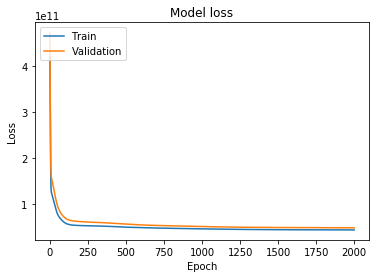

In [118]:
#Plotando dados de treino
plt.plot(modelo.history['loss'])
plt.plot(modelo.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Predizendo resultados para base de test:

In [119]:
pred=regressor.predict(X_test)
pred

array([[ 519912.  ],
       [ 616277.56],
       [ 373487.16],
       ...,
       [1278981.  ],
       [ 428995.03],
       [ 413221.1 ]], dtype=float32)

Avaliando performance na base de teste:

In [120]:
eqm_nn = regressor.evaluate(X_test, y_test, verbose=0)
print("EQM na base de teste:", eqm_nn) 

EQM na base de teste: 45905753348.499535


Comparando os dois EQMs:

In [121]:
print("O EQM da regressão linear é", eqm_linear_regression/eqm_nn-1, "vezes maior que o da Rede Neural.")

O EQM da regressão linear é 0.16413256635523288 vezes maior que o da Rede Neural.


E agora, acabou!? Claro que não... Apesar de parecer que o modelo teve um bom desempenho tanto nas bases de treino e de validação, resta o processo de otimização do modelo - queremos extrair o máximo de performance preditiva que o modelo pode nos proporcionar. Algumas perguntas pertinentes neste momento são: (i) "o modelo é flexível o bastante para se adequar aos dados?" e (ii) "nosso modelo é demasiadamente flexível, impedindo generalizações?". A primeira preocupação se deve so problema do *underfitting*, ou seja, vocês não está tirando o máximo que o modelo pode oferecer e ainda há espaço para criar um modelo mais complexo (com mais parâmetros). Por outro lado, a segunda preocupação de deve so problema do *overfitting*, ou seja, o modelo ficou tão complexo (flexível) que ele acaba "decorando" os dados de treinamento tendo uma ótima performanca nesta base mas a capacidade de generalização é pouca. Na imagem abaixo, você conseguirá ver a diferença entre casos de *underfittint*, *overfitting* e melhor fit:

In [104]:
Image(url= "p3.png", width=500, height=300)

Adaptado de: https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png.


O problema do *underfitting* não é comum quando estamos trabalhando com Redes Neurais, pois esta classe de modelo é super flexível. Mas como identificar o *overfitting*, por exemplo? É comum olharmos o gráfico Epochs Vs. Loss e vemos se a partir de certo momento começa haver divergência entre o erro na base de treino e na base de validação:

In [33]:
Image(url= "p4.png", width=600, height=300)

Adaptado de: https://cdn-images-1.medium.com/max/1600/1*vuZxFMi5fODz2OEcpG-S1g.png.

Uma alternativa seria mandar o computador parar o processo de aprendizado com *early stopping*, ou seja, dar um *break*. Outra alternativa seria utilizar métodos de regularização como penalidades *L1*, *L2* ou o método *dropout*. Os métodos de penalidades impõe certas restrições sobre os pesos aprendidos, tornando o modelo menos flexível e são muito usados em muitos tipos de modelos. Já o método *dropout* é mais moderno e muito utilizado em Redes Neurais - esse método consiste em "desligar" uma série de neurônios em uma camada oculta específica a cada iteração, assim impedindo a "memorização" dos dados que já foi comentada. Para utilizar o método *dropout* basta definir a proporção de neurônios que serão desligados aleatóriamente a cada iteração - é comum utilizar uma proporção de 10% a 30%.

#### Hyperparameter Tuning

Os Hiperparâmetros são parâmetros que afetam a performance do modelo mas que não são aprendidos pelo modelo. Por exemplo, os pesos são parâmetros mas são aprendidos pelo processo de aprendizado já descrito, já o número de neurônios na camada oculta não é aprendido pelo modelo e tem grande impacto na performance do algoritmo - temos que o número de neurônios na camada oculta é um hiperparâmetro. Outro hiperparâmetro no nosso experimento é a taxa de *dropout*. Mas como saber a melhor combinação de número de neurônios na camada oculta e taxa de *dropout*? Pelo processo de validação. No exemplo abaixo, iremos utilizar a metodologia do *random search* para acharmos a melhor combinação de hiperparâmetros - isso quer dizer que vamos definir um intervalo aceitável para o número de neurônios e um intervalo aceitável para a taxa de *dropout*, sortear um par (# neurônios, taxa *drop.*) e testar a performance do modelo medida, neste caso, pelo Erro Quadrático Médio. O processo é repetido *N* vezes e escolhemos o par que nos dá  a melhor performance. Vamos lá!

In [134]:
#definindo intervalo de # neurônios
interval_neur=list(range(300,1000))
#definindo intervalo de % dropout
interval_drop=[.1,.3]

#Número de iterações
N=10

#Fixando semente para replicabilidade
np.random.seed(42)

In [ ]:
#Processo de validação
for i in range(N):
    
    #sorteando par
    neur=np.random.choice(interval_neur)
    drop=float(np.random.uniform(interval_drop[0],interval_drop[1],1)) 
    
    #Definindo modelo
    input_data = Input(shape=(np.shape(X_train)[1],))
    Drop=Dropout(drop)(input_data)
    hidden = Dense(neur, activation='relu')(Drop)
    output = Dense(1, activation='linear')(hidden)

    #criando modelo
    regressor = Model(input_data, output)

    #Fitting
    Adam=keras.optimizers.Adam(lr=0.1)
    regressor.compile(optimizer=Adam, loss='mean_squared_error')

    modelo=regressor.fit(X_train, y_train,
                          epochs=2000,
                          batch_size=300,
                          shuffle=True,
                          validation_data=(X_val, y_val),verbose=0)
    
    #Avaliando na base de validação
    score = regressor.evaluate(X_val, y_val, verbose=0)
    
    #Definindo o melhor par de hiperparâmetros até o momento, 
    #guardando melhor score e melhor modelo
    if i==0:
        melhor_par=[neur,drop]
        melhor_score=score
        melhor_modelo=regressor
    
    elif score>melhor_score:
        melhor_par=[neur,drop]
        melhor_score=score
        melhor_modelo=regressor

Agora que já realizamos o processo de validação, vamos ver quais os melhores hiperparâmetros:

In [136]:
melhor_par

[466, 0.2969297571987925]

Vamos agora checar a performance do nosso modelo em nossa base de testes:

In [137]:
score = melhor_modelo.evaluate(X_test, y_test, verbose=0)
print("EQM na base de teste:", score)

EQM na base de teste: 83494648730.642


Vamos predizer os preços para a base de teste e fazer uma comparação com os preços reais com a ajuda de um *scatter-plot*:

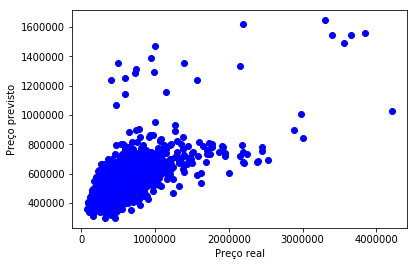

In [138]:
y_test_pred=melhor_modelo.predict(X_test)

plt.plot(y_test, y_test_pred, 'bo')
plt.ylabel('Preço previsto')
plt.xlabel('Preço real')
plt.show()

Perceba que no caso ideal, todos os pontos ficariam em cima da reta de 45º e que sai da origem. Uma coisa interessante para se prestar a atenção é que os imóveis mais caros tem seus preços subestimados.

**Exercício:** por que você acha que os imóveis mais caros tem seus preços subestimados?

Agora vamos plotar a diferença entre o predito e o real:

In [139]:
#garantindo mesmo formato
y_test_pred=np.reshape(y_test_pred,-1) 
y_test=np.reshape(y_test,-1)

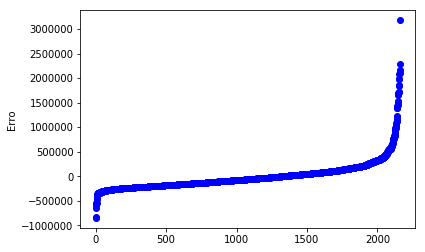

In [140]:
diff=y_test-y_test_pred
diff=np.sort(diff)

plt.ylabel('Erro')
plt.plot(diff, 'bo')
plt.show()